# 최적설계Optimum Design


- 주요 참고 문헌(예제 인용) : 최적설계입문Introduction to Optimum Design, Jasbir S. Arora<sup>[1]</sup>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

sympy.init_printing()

## 경사도 벡터Gradient

- 선형회귀에서 회귀계수를 찾아내기 위한 알고리즘의 핵심

- $n$개의 변수 $x_1$, $x_2$, ... , $x_n$에 대한 함수 $f(\mathbf{x})$의 $\mathbf{x}^*$에서의 편미분

$$
c_i = \frac{\partial \, f(\mathbf{x}^*)}{\partial \, x_i}, \quad i=1, \dots, n
$$

- 이를 열벡터로 모으면 경사도 벡터

$$
\triangledown f(\mathbf{x}^*) = \begin{bmatrix}
\dfrac{\partial \, f(\mathbf{x}^*)}{\partial \, x_1} \\
\dfrac{\partial \, f(\mathbf{x}^*)}{\partial \, x_2} \\
\vdots \\
\dfrac{\partial \, f(\mathbf{x}^*)}{\partial \, x_n}
\end{bmatrix} = \begin{bmatrix}
\dfrac{\partial \, f(\mathbf{x}^*)}{\partial \, x_1} &
\dfrac{\partial \, f(\mathbf{x}^*)}{\partial \, x_2} &
\cdots &
\dfrac{\partial \, f(\mathbf{x}^*)}{\partial \, x_n}
\end{bmatrix}^{\text{T}}
$$

- $\triangledown$ 각 성분으로의 미분 연산을 의미하며 'nabla'라고 읽음

- 다음은 2변수, 3변수 함수의 경사도 벡터 $\triangledown f$를 나타냄

<img src="03-optim/grad3.png">

## 헤시안<sup>Hessian</sup>

- 경사도 벡터를 한번 더 미분, 즉 두번 미분

$$
\triangledown^2 f(\mathbf{x}^*) =\frac{\partial^2 f(\mathbf{x}^*)}{\partial \,\mathbf{x} \,  \partial \,\mathbf{x}} =
\begin{bmatrix}
\dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x^{2}_1} & \dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_1 \partial x_2} & \cdots & \dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_1 \partial x_n} \\
\dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_2 \partial x_1} & \dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_2 \partial x_n}\\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_n \partial x_1} & \dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_n^ \partial x_2} & \cdots & \dfrac{\partial^2 f(\mathbf{x}^*)}{\partial x_n^2}
\end{bmatrix}
$$

- 헤시안은 대칭행렬

- 행렬형식 표현

$$
\mathbf{H} = \left[ \frac{\partial^2 f}{\partial x_i \partial x_j} \right] ; \quad i=1,n, \,  j=1, n
$$




- 예제 : 다음 함수에서 점(1,2)에서의 경사도벡터와 헤시안을 계산

$$
f(\mathbf{x}) = x_1^3 + x_2^3 + 2x_1^2 + 3x_2^2 - x_1 x_2 + 2x_1 + 4x_2
$$

- 1계 편도함수

$$
\frac{\partial f}{\partial x_1} = 3 x_1^2 + 4 x_1 - x_2 + 2 \\[5pt]
\frac{\partial f}{\partial x_2} = 3 x_2^2 + 6 x_2 - x_1 + 4 
$$

- $x_1 = 1$, $x_2 = 2$에서의 경사도 벡터

$$
\triangledown f(1,2) = \begin{bmatrix} 7 \\ 27 \end{bmatrix}
$$

- 헤시안을 위해 한번 더 미분

$$
 \begin{array}{lcl}
\dfrac{\partial^2 f}{\partial x_1^2}=6x_1 +4 & &\dfrac{\partial^2 f}{\partial x_1 \partial x_2}=-1\\
\dfrac{\partial^2 f}{\partial x_2 \partial x_1}=-1 & &\dfrac{\partial^2 f}{\partial x_2^2}=6x_2 +6
\end{array}
$$

- $x_1 = 1$, $x_2 = 2$에서의 헤시안

$$
\mathbf{H}(1,2) = \begin{bmatrix} 10 & -1 \\ -1 & 18 \end{bmatrix}
$$



## 테일러 급수<sup>Taylor series</sup>

- 미분가능한 함수를 어느 점 근처에서 다항식으로 근사하는 방법

- 스코틀랜드의 수학자 그레고리<sup>James Gregory</sup>가 시초

- 1715년 이후, 영국의 수학자 테일러<sup>Brook Taylor</sup>에 의해 널리 알려짐<sup>[2]</sup>


$$
f(x) = f(x^*) + \frac{d f(x^*)}{dx} (x - x^*) + \frac{1}{2} \frac{d^2 f(x^*)}{dx^2}(x - x^*)^2 + R
$$

- 위 식의 의미는 어떤 점 $x^*$이 근처에서 함수 $f(x)$의 값은 위 식처럼 계산될 수 있다는 것 

- 약간 다르게 표현 하기 위해 $x-x^* = d$로 두고

$$
f(x^* + d) = f(x^*) + \frac{d f(x^*)}{dx} d + \frac{1}{2} \frac{d^2 f(x^*)}{dx^2}d^2 + R
$$

- 어떤 점 $x^*$에서 $d$만큼 떨어진 곳의 함수값은 $f(x^*)$를 중심으로 위 식처럼 계산될 수 있다.

- 실험으로 확인



In [ ]:
#%matplotlib inline
plt.rcParams["figure.figsize"] = (16,5)

import math

def  taylor_e(x, a, n) :
    # x* = a 에서 전개
    # f(x) = e^{a} + e^{a}*(x-a) + e^{a}/2*(x-a)^2 + R
    fx =  np.exp(a)
    
    # 테일러 시리즈 전개, 각 항의 상수는 일반적으로 1/1!, 1/2!, 1/3!, ..., 1/N!
    for i in range(1, n+1) : 
        fx += np.exp(a)/math.factorial(i)*(x-a)**i
    
    #return np.exp(a) + np.exp(a)*(x-a) + np.exp(a)/2 * (x-a)**2
    return fx
    
x = np.linspace(0, 5)
y = np.exp(x)

fig, ax = plt.subplots(1,3)

fx1 = taylor_e(x, 3, 1)
fx2 = taylor_e(x, 3, 2)
fx3 = taylor_e(x, 3, 3)

ax[0].plot(x, y , lw=3, label="$e^x$")
ax[0].plot(x, fx1, lw=3, label="Taylor f(x) order 1", color=style_colors[1])
ax[0].legend(fontsize=15)

ax[1].plot(x, y , lw=3, label="$e^x$")
ax[1].plot(x, fx2, lw=3, label="Taylor f(x) order 2", color=style_colors[2])
ax[1].legend(fontsize=15)

ax[2].plot(x, y , lw=3, label="$e^x$")
ax[2].plot(x, fx3, lw=3, label="Taylor f(x) order 3", color=style_colors[3])
ax[2].legend(fontsize=15);

plt.suptitle("Taylor series, order=1,2,3", fontsize=15)
plt.show()

### 2변수 이상 테일러 급수

- 2차 항을 각 변수별로 모두 만들어 줌

$$
\begin{align}
& f(x_1, x_2) \\[5pt]
= \, &  f(x_1^*, x_2^*) + \frac{\partial f}{\partial x_1}(x_1 - x_1^*) + \frac{\partial f}{\partial x_2}(x_2 - x_2^*) \\[5pt]
&+ \frac{1}{2} \left[ \frac{\partial^2 f}{\partial x_1^2}(x_1 - x_1^*)^2 + 2 \frac{\partial^2 f}{\partial x_1 \partial x_2} (x_1 - x_1^*)(x_2 - x_2^*) + \frac{\partial^2 f}{\partial x_2^2}(x_2 - x_2^*)^2 \right] \\[5pt]
&+ R
\end{align}
$$

- 시그마 기호로 쓰면

$$
\begin{align}
f(x_1, x_2) &=  f(x_1^*, x_2^*) + \sum_{i=1}^{2} \color{RoyalBlue}{\frac{\partial f}{\partial x_i}}(x_i - x_i^*)  \\[5pt]
&+ \frac{1}{2}  \sum_{i=1}^{2} \sum_{j=1}^{2}  \color{OrangeRed}{\frac{\partial^2 f}{\partial x_i \partial x_j}} (x_i - x_i^*)(x_j - x_j^*) +  R
\end{align}
$$

- 색깔로 표시된 부분은 경사도벡터와 헤시안 행렬의 성분임을 이용하여 더 간략히 쓰면

$$
f(\mathbf{x}) = f(\mathbf{x}^*) + \triangledown f^{\text{T}}(\mathbf{x} - \mathbf{x}^*) + \frac{1}{2}(\mathbf{x}-\mathbf{x}^*)^{\text{T}} \mathbf{H}(\mathbf{x}-\mathbf{x}^*) + R
$$

- 1 변수와 마찬가지로 $\mathbf{x} - \mathbf{x}^* = \mathbf{d}$ 로 두면

$$
f(\mathbf{x}^* + \mathbf{d}) = f(\mathbf{x}^*) +  \triangledown f^{\text{T}} \mathbf{d} + \frac{1}{2} \mathbf{d}^{\text{T}} \mathbf{H} \mathbf{d} + R
$$

- $f(\mathbf{x}^*)$를 이항하면 좌변은 $\Delta f = f(\mathbf{x}^* + \mathbf{d})-f(\mathbf{x}^*)$ 가 되고 이는 $\mathbf{x}^*$에서 $\mathbf{x}$로 이동했을 때 함수값의 변화량이 된다.

$$
\Delta f = \triangledown f^{\text{T}} \mathbf{d} + \frac{1}{2} \mathbf{d}^{\text{T}} \mathbf{H} \mathbf{d} + R
$$



## 경사도벡터의 중요 성질 

- 다음 두 경사도벡터의 성질은 경사하강법<sup>gradient descent</sup>의 근간

### 1. 함수표면의 접면에 수직

### 2. 경사도벡터의 방향은 함수의 최대증가방향

<img src="03-optim/grad-prop2.png" width="650" />

- 위 그림에서 함수값 0.4에서 0.8로 가려고 할때 가장 빠른 경로를 생각

- 자세한 증명은 부록으로 제공

- 방향도함수<sup>directional derivative</sup>의 개념을 사용하지만 지금까지 배운 편미분과 테일러시리즈의 지식으로 이해 가능



## 경사도, 헤시안을 이용한 최적조건

- 최적해를 위한 필요조건과 충분조건

- 필요조건 : 최적점에서 만족되어야 할 조건

- 필요조건을 만족하지 않으면 최적점이 아님

- 하지만 필요조건이 만족되었다고 최적점을 보장하는 것은 아님

- 따라서 필요조건을 만족하면 후보최적점<sup>candidate optimum point</sup>

- 후보최적점에 대해 충분조건을 검토하여 최적점을 판단



### 최적화 문제에는

- 다음 두 종류의 문제가 존재

- 본 수업에서는 비제약 최적화 문제만 다룸

#### 비제약 최적설계 문제

- 주어진 목적함수의 값을 무조건 작게 하는 변수 $\mathbf{x}$의 값을 찾는 문제

#### 제약 최적설계 문제

- 주어진 목적함수의 값을 작게하나 지정된 $\mathbf{x}$의 범위 내에서만 값을 찾는 문제

### 비제약 최적설계 문제

- 최적화 시킬 변수 $\mathbf{x}$에 관한 제약이 없는 상태에서 $f(\mathbf{x})$를 최소화

- 제약 문제를 비제약 문제로 환원하는 것이 가능하므로 비제약 문제를 이해하는 것이 중요

- 준비 

    - $\mathbf{x}^*$를 지역 최소점으로 가정

    - 최소점으로 부터 약간의 이동 $\mathbf{d} = \mathbf{x}-\mathbf{x}^*$

    - 그에 따른 함수의 변화 
    
    $$
    \Delta f = f(\mathbf{x}) - f(\mathbf{x}^*) \ge 0 \tag{1}
    $$
    
    - 식 (1)은 임의의 증분 $\mathbf{d}$에 대해 성립 필요
    
    - $\mathbf{d}$가 매우 작으므로 $\Delta f$ 를 $\mathbf{x}^*$에서 테일러 시리즈로 근사


    

### 1계 필요조건<sup>first order necesssary condition</sup>

#### 일변수 함수의 경우

- 최소점이 되기 위해 반드시 만족시켜야 하는 조건

- 최소점으로 가정한 점 $x^*$에서 테일러 시리즈

$$
f(x) = f(x^*) + f'(x^*) \, d + \frac{1}{2} f''(x^*) \, d^2 + R
$$

- $f(x^*)$를 이항하면 변화량 $\Delta f$는

$$
\Delta f = f'(x^*) d + \frac{1}{2} f''(x^*) \, d^2 + R
$$

- $x^*$가 최소라는 가정이 맞다면  $\Delta f$는 음수가 아님

- $d$는 매우 작은 증분이므로 $\Delta f$에서 $f'(x^*) d$가 지배항

- 그 뒤로는 제곱, 세제곱으로 급격히 작아진다.

- 따라서 $\Delta f$를 음이 아니게 하기 위해서 지배항 $f'(x^*) d$가 음이 아니어야 한다!

- $d$의 부호에 상관없이 $\Delta f$를 음이 아니게 하기 위해서 

- **지역 최소를 위한 1계 필요조건**

$$
\color{OrangeRed}{f'(x^*) =0} \tag{2}
$$



- 필요조건을 만족시킨다면 그점은

    - 지역 최소
    - 지역 최대
    - 변곡점
    
- 이런 점을 통틀어 상점<sup>staionary point</sup>



#### 다변수 함수의 경우

- 똑같은 논리 적용

- 테일러 시리즈

$$
f(\mathbf{x}) = f(\mathbf{x}^*) + \triangledown f\left(\mathbf{x}^*\right)^{\text{T}}\mathbf{d} + \frac{1}{2}\mathbf{d}^{\text{T}} \mathbf{H}\left(\mathbf{x}^*\right)\mathbf{d} + R
$$

- 음이 되면 안되는 함수의 변화량 

$$
\Delta f = \triangledown f\left(\mathbf{x}^*\right)^{\text{T}}\mathbf{d} + \frac{1}{2}\mathbf{d}^{\text{T}} \mathbf{H}\left(\mathbf{x}^*\right)\mathbf{d} + R
$$

- 경사도벡터에 대한 필요조건

$$
\color{OrangeRed}{\triangledown f\left(\mathbf{x}^*\right) = \mathbf{0}} \tag{2*}
$$

## 최적설계의 수치해법

- 만약 목적함수가 미분 가능이기는 하지만 미분 가능할 정도로 정식화되지 않았다면?

- 변수의 값에 따른 목적함수의 값만을 계산할 수 있는 상황이라면?

### 수치 알고리즘 일반개념

- 최적화 수치 알고리즘은 일반적으로 다음 단계를 따름

    - 단계 1. 타당성있는 출발점 $\mathbf{x}^{(0)}$ 추정, $k=0$
    - 단계 2. 탐색방향 $\mathbf{d}^{(k)}$를 계산
    - 단계 3. 수렴 검토
    - 단계 4. 양의 이동거리 $\alpha_k$ 계산
    - 단계 5. 새로운 설계 변수 계산 $\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}$, $k=k+1$ 단계 2로 
    
- 따라서   $\alpha_k$와   $\mathbf{d}^{(k)}$ 계산이 중요



    
### 경사도 수치계산

- 목적함수를 미분할 수 있는 함수의 형태를 모를 때 함수값만으로 미분계수를 구함

- 이론적으로 극한을 정의를 동원하지만 컴퓨테이션에서는 그냥 종속변수의 작은 변화를 독립변수의 작은 변화로 나눈 것

#### 전방차분법
$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, \color{RoyalBlue}{x_i + \Delta x_i} , \cdots, x_n) - f(x_1, \cdots, x_i, \cdots, x_n)}{\Delta x_i}
$$

#### 후방차분법
$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, x_i, \cdots, x_n)-f(x_1, \cdots, \color{RoyalBlue}{x_i + \Delta x_i} , \cdots, x_n) }{\Delta x_i}
$$

#### 중앙차분법
$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, \color{RoyalBlue}{x_i+\frac{1}{2}\Delta x_i}, \cdots, x_n)-f(x_1, \cdots, \color{RoyalBlue}{x_i - \frac{1}{2} \Delta x_i} , \cdots, x_n) }{\Delta x_i}
$$



#### 경사도 수치계산 실습

$$
f(x) = \frac{4x}{x^2 + 1}
$$



In [ ]:
x = sympy.Symbol('x')

sympy.simplify(sympy.diff((4*x)/(x**2 + 1), x))

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)

def f(x):
    """
    실습용 함수 정의
    """
    return 4*x / (x**2  + 1)

def df_anal(x):
    """
    sympy의 결과로 얻은 도함수
    """
    return (-4*x**2 + 4)  / (x**4 + 2*x**2 + 1)

def df_numer(x):
    """
    수치적으로 도함수의 값을 계산하는 함수
    중앙차분법으로 바꿔보세요.
    """
    h = 0.1
    return (f(x+h) - f(x)) / h
    
x = np.linspace(-5, 5, 200)

plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x) = \frac{4x}{(x^2  + 1)}$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer(x), color=style_colors[1], lw=3, label=r"Numerical derivative")
plt.legend(fontsize=20)

plt.suptitle("Numerical derivative", fontsize=20)
plt.show()

### 강하단계

- 어떤 방향이 바람직한 $\mathbf{d}^{(k)}$ 방향인가?

- 반복의 목적은 목적함수 $f(\mathbf{x})$의 최소점에 도달하는 것

- 알고리즘의 $k$번째 반복에서 $\mathbf{x}^{(k)}$가 최소점이 아니라면 더 작은 목적함수값을 가지는 다른점  $\mathbf{x}^{(k+1)}$가 있다.

$$
f\left(\mathbf{x}^{(k+1)}\right) < f\left(\mathbf{x}^{(k)}\right)
$$

- 위 식 좌변에 단계 5의 식을 대입($\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}$)

$$
f\left(\mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}\right) <  f\left(\mathbf{x}^{(k)}\right) \tag{*}
$$

- $ f\left(\mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}\right)$는 $f\left(\mathbf{x}^{(k)}\right)$에서 $\alpha_k \mathbf{d}^{(k)}$만큼 변화한 것이므로 테일러 시리즈 전개

$$
f(\mathbf{x}^* + \mathbf{d}) = f(\mathbf{x}^*) +  \triangledown f^{\text{T}} \mathbf{d} + \frac{1}{2} \mathbf{d}^{\text{T}} \mathbf{H} \mathbf{d} + R
$$

- 위 식대로 맞춰서 전개하면 ( $ \mathbf{c}^{(k)}$는 경사도벡터)

$$
 f\left(\mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}\right)= f\left(\mathbf{x}^{(k)} \right) + \mathbf{c}^{(k)} \cdot \left( \alpha_k \mathbf{d}^{(k)} \right) +R
$$

- 전개한 결과를 $(*)$에 대입

$$
\begin{align}
f\left(\mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}\right) 
&= f\left(\mathbf{x}^{(k)} \right) + \mathbf{c}^{(k)} \cdot \left( \alpha_k \mathbf{d}^{(k)} \right) +R \\[5pt]
&\approx  f\left(\mathbf{x}^{(k)} \right) + \mathbf{c}^{(k)} \cdot \left( \alpha_k \mathbf{d}^{(k)} \right) <  f\left(\mathbf{x}^{(k)}\right)
\end{align}
$$

- 따라서 최종적으로 다음과 같은 부등식을 얻는다.

$$
\begin{align}
\alpha_k \left( \mathbf{c}^{(k)} \cdot \mathbf{d}^{(k)} \right)  &< 0 \\[5pt]
\mathbf{c}^{(k)} \cdot \mathbf{d}^{(k)}  & < 0 \quad \because \alpha_k > 0
\end{align} 
$$

- 위 부등식의 의미 : **$\mathbf{x}^{(k)}$를 $\mathbf{x}^{(k+1)}$로 개선시키기 위한 탐색방향 $ \mathbf{d}^{(k)}$는 경사도벡터 $\mathbf{c}^{(k)}$와 90&deg;에서 270&deg; 사이에 있어야 한다.**

- 위 부등식으로 표시되는 강하조건<sup>descent condition</sup>을 만족하는 방향을 강하방향<sup>descent direction</sup>

- 강하방향에 기반한 방법을 **강하법** 이라 한다.


<img src="03-optim/descent-direction.png" width="750">



### 일차원 최소화

#### 일변수 함수로 환원

- 설계 변화의 바람직한 방향 $\mathbf{d}^{(k)}$를 알 때 설게변수의 업데이트에 대해서 목적함수는

$$
f \left(\mathbf{x}^{(k+1)} \right) = f\left(\mathbf{x}^{(k)} + \alpha \mathbf{d}^{(k)}\right)
$$

- $\alpha$만의 함수로 목적함수가 업데이트

$$
f\left(\mathbf{x}^{(k+1)}\right) = f\left(\mathbf{x}^{(k)} + \alpha \mathbf{d}^{(k)}\right) \equiv \bar{f}(\alpha)
$$

- 즉, 현재 위치 $\mathbf{x}^{(k)}$에서 $\mathbf{d}^{(k)}$방향으로 양수 $\alpha$ 만큼 나아가면서 목적함수 $f$를 줄여나간다.
 
- 1변수 함수에 대한 필요조건 $\dfrac{d f}{d \alpha}=0$을 도입하면 정확하게(해석적으로) 얼마나 나아갈지 결정할 수 있다.

- $f$는 $\mathbf{x}^{(k+1)}$의 함수인데 $\mathbf{x}^{(k+1)}$은 다시 $\alpha$의 함수이므로 연쇄법칙을 적용

$$
\frac{d f\left(\mathbf{x}^{(k+1)}\right)}{d \alpha} = \frac{\partial f\left(\mathbf{x}^{(k+1)}\right)}{\partial \, \mathbf{x}} \frac{d \, \mathbf{x}^{(k+1)}}{d \alpha} = \triangledown f\left(\mathbf{x}^{(k+1)}\right) \cdot \mathbf{d}^{(k)} = 0
$$

- 따라서 강하방향으로의 이동거리는 아래 식처럼 경사도벡터와 강하방향의 내적이 0 다시말해 두 벡터가 수직이 될때까지 진행

$$
\mathbf{c}^{(k+1)} \cdot \mathbf{d}^{(k)}=0
$$

- 다음 그림은 일차원 최소화 과정을 나타낸 것이다. 

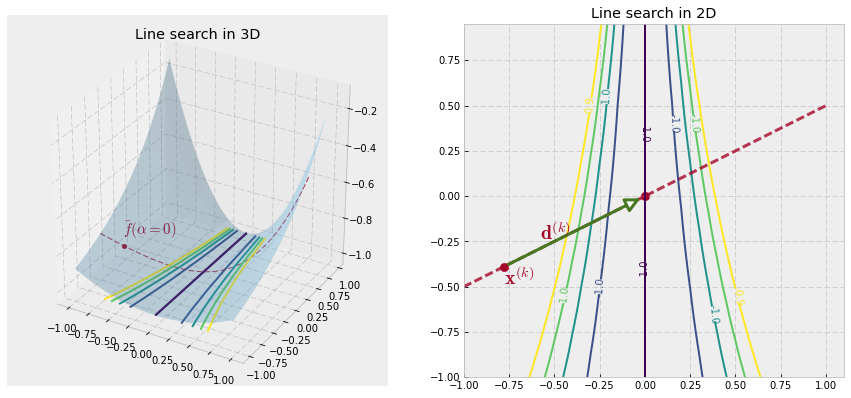

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import ConnectionPatch

plt.rcParams["figure.figsize"] = (10, 7)

# 데이터 준비
x1 = x2 = np.arange(-1.0, 1.0, 0.05)
X1, X2 = np.meshgrid(x1, x2)
Z = (1/3)*(X1**2)*(np.exp(X2))-1

s = np.linspace(-0.5, 0.5, 100)
s2 = np.linspace(-0.5, 0.5, 10)
S = np.array([2*s, s])
S2 = np.array([2*s2, s2])
C = (1/3)*(S[0,:]**2)*(np.exp(S[1,:]))-1
C2 = (1/3)*(S2[0,:]**2)*(np.exp(S2[1,:]))-1

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

#Basic contour plot
levels1 = np.linspace(-1, -0.95, 5)

CS = ax1.contour(X1, X2, Z, zdir='z', levels=np.concatenate((levels1, )),  offset=-1.0, cmap='viridis')
ax1.clabel(CS, CS.levels,   fmt='%1.0f', inline=True, fontsize=10)
ax1.plot_surface(X1, X2, Z,rstride=5, cstride=5, color=style_colors[6], alpha=0.3)
ax1.plot3D(S[0,:], S[1,:], C ,'--', lw=1, color=style_colors[1], alpha=0.8)
ax1.scatter3D(S2[0,1], S2[1,1], C2[1], s=20, alpha=1, color=style_colors[1])

CS = ax2.contour(X1, X2, Z,  zdir='z', levels=levels1, offset=-1.0,  cmap='viridis')
ax2.clabel(CS, CS.levels,  fmt='%0.001f', inline=True, fontsize=10)
ax2.plot(S[0,:], S[1,:], '--', lw=3, color=style_colors[1], alpha=0.8)
ax2.scatter(S2[0,1], S2[1,1],  s=70, alpha=1, color=style_colors[1])
ax2.scatter(0,0,  s=70, alpha=1, color=style_colors[1])
con = ConnectionPatch(xyA=(S2[0,1], S2[1,1]), xyB=(0,0), coordsA="data", coordsB="data", color=style_colors[3], lw=3,
                     arrowstyle="-|>", shrinkA=5, shrinkB=5,
                      mutation_scale=30, fc="w", zorder=2)
ax2.add_artist(con)

ax1.text(S2[0,1], S2[1,1], -0.8,r'$\bar{f}(\alpha=0)$', color=style_colors[1], fontsize=15)
ax2.text(S2[0,1]+0.2, S2[1,1]+0.15, r'$\mathbf{d}^{(k)}$', color=style_colors[1], fontsize=20)
ax2.text(S2[0,1], S2[1,1]-0.1, r'$\mathbf{x}^{(k)}$', color=style_colors[1], fontsize=20)

ax1.set_title("Line search in 3D")
ax2.set_title("Line search in 2D")

ax1.view_init(30,-60)

plt.show()

#### 등간격 탐색

- 가장 쉽게 생각할 수 있는 방법 : $f(\alpha=0)$에서 $\alpha$를 등간격 $\delta$만큼 증가시키면서 함수값 계산

- 현재 함수값이 증가하면 전, 전 스탭 함수값을 좌측값, 현재 함수값을 우측값으로 설정하고 $\delta$를 적당히 줄이고 다시 반복

#### 황금분할탐색

- 최소값이 있을 것 같은 구간을 황금비율로 잘라 구간을 계속 좁혀나가는 방법

- 좁혀진 구간을 다시 좁힐 때 이전에 계산해둔 값을 재사용할 수 있어 계산량을 줄임


<img src="03-optim/gss.png" width="650"/>


- 황금비 $\tau= \left(\sqrt{5} -1 \right)/2 = 0.618$로 두고 탐색 구간 $I$ 내부의 두 점을 $\tau I = 0.618I$와 $(1-\tau)I = 0.382I$ 로 잡고 구간 줄이기



In [17]:
def gss(a, b, x, d,  tol=1e-12):
    '''
    https://en.wikipedia.org/wiki/Golden-section_search
    golden section search
    to find the minimum of f on [a,b]
    f: a strictly unimodal function on [a,b]
    a, b : search interval
    x :  current design variables
    d : descent direction
    '''
    gr = (np.sqrt(5) + 1) / 2
    
    l = b - (b - a) / gr
    r = a + (b - a) / gr 
    
    while abs(l - r) > tol:
        if f_alpha(l, x, d) < f_alpha(r, x, d):
            b = r
        else:
            a = l

        # we recompute both c and d here to avoid loss of precision 
        # which may lead to incorrect results or infinite loop
        l = b - (b - a) / gr
        r = a + (b - a) / gr

    return (b + a) / 2

In [ ]:
plt.rcParams["figure.figsize"] = (14,5)

def func(x):
    """
    최소화 시킬 함수를 정의 한다. 아무 함수나 적당히 바꿔가면서 실험가능
    """
    return  x**3 - x**2 - 4*x + 4

def fa(x_star, alpha):
    x = x_star + alpha
    
    return  func(x)


def gss_for_demo(a, b, x, func, tol=1e-7):
    '''
    golden section search
    to find the minimum of f on [a,b]
    f: a strictly unimodal function on [a,b]
    a, b : search interval
    x :  current design variables
    '''
    gr = (np.sqrt(5) + 1) / 2
    
    l = b - (b - a) / gr
    r = a + (b - a) / gr 
    
    hist = []
    
    while abs(l - r) > tol:
        hist.append((a, l, r, b))
        if func(x, l) < func(x, r):
            b = r
        else:
            a = l

        # we recompute both c and d here to avoid loss of precision 
        # which may lead to incorrect results or infinite loop
        l = b - (b - a) / gr
        r = a + (b - a) / gr

    return hist, (b + a) / 2

# 1차원 탐색할 원함수의 범위를 지정한다.
x = np.linspace(-2, 3, 100)
# alpha=0에서 앞쪽 구간 얼마나 탐색할지 구간을 정해주는 상수, 적당히 세팅한다.
B = 3
#탐색을 시작할 스타팅 포인트를 지정한다.
x_star = -0.5

# 1차원 탐색 구간을 만들고
a = np.linspace(0, B, 100)
# 1차원 목적함수의 값을 계산한다.(그림 그리기용)
f = fa(x_star, a)

# 황분분할 탐색을 시도한다.
hist, mini = gss_for_demo(0, B,  x_star, fa)

# 원함수의 1차원 방향의 단면
plt.plot(x, func(x), color=style_colors[0], label='Contour in a descent direction')
plt.plot(x_star, func(x_star), 'o')

# 황금분할탐색에서 사용한 1차원 함수
plt.plot(a, f, color=style_colors[1], lw=3, label=r'$f(\alpha)$')

for i in range(6) :
    plt.plot(hist[i][0], 0+(1*i),  'o', color=style_colors[i])
    plt.plot(hist[i][1], 0+(1*i),  'o', color=style_colors[i])
    plt.plot(hist[i][2], 0+(1*i),  'o', color=style_colors[i])
    plt.plot(hist[i][3], 0+(1*i),  'o', color=style_colors[i])

plt.text(0., f[0], r'$f(\alpha=0)$', fontsize=15)    
plt.legend(fontsize=15)
plt.axvline(x=0, color=style_colors[0])
plt.suptitle("Golden section search", fontsize=15)

plt.show()

print("minimum at alpha= {:E} , start at x={}".format(mini, x_star))

### 최속강하법<sup>steepest descent method</sup>

- 최속강하법 알고리즘<sup>[1]</sup>
<div class="summary">
    **Step 1**. Estimate a starting design as $\mathbf{x}^{(0)}$. Set the iteration counter $k=0$. Select the convergence parameter $\epsilon$. 
    $$
    $$

    **Step 2**.  Calculate the gradient of $f(\mathbf{x})$ at the current point $\mathbf{x}^{(k)}$ as $\mathbf{c}^{(k)} = \triangledown f\left(\mathbf{x}^{(k)}\right )$.
    $$
    $$
                   
    **Step 3**.  Calculate the length of $\mathbf{c}^{(k)} $ as $\lVert \mathbf{c}^{(k)} \rVert$. If $\lVert \mathbf{c}^{(k)} \rVert < \epsilon$ , then stop the iterative process because $\mathbf{x}^* = \mathbf{x}^{(k)}$ is a local minimum point. Otherwise, continue.
    $$
    $$
        
    **Step 4**.   Let the search direction at the current point $x^{(k)}$ be $\mathbf{d}^{(k)} = - \mathbf{c}^{(k)}$. 
    $$
    $$
                
    **Step 5**. Calculate a step size $\alpha_k$ that minimizes $f(\alpha)=f\left(\mathbf{x}^{(k)}+\alpha \mathbf{d}^{(k)}\right)$ in the direction $\mathbf{d}^{(k)}$. Any one-dimensional search algorithm may be used to determine $\alpha_k$.
    $$
    $$
    
    **Step 6**. Change the design as follows: set $k=k+1$ and go to Step 2.
    $$
    \mathbf{x}^{(k+1)} =  \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}
    $$
</div>


<table>
<tr>
<td>
<img src="03-optim/Gradient_ascent_(contour).png">
</td>
<td>
<img src="03-optim/Gradient_ascent_(surface).png">
</td>
</tr>
<tr>
<td colspan="2">https://en.wikipedia.org/wiki/Gradient_descent : public domain</td>
</tr>
</table>

### 공액경사도법<sup>conjugate gradient method</sup>

- 공액경사도법 알고리즘<sup>[1]</sup>
<div class="summary">
    **Step 1**. Estimate a starting design as $\mathbf{x}^{(0)}$. Set the iteration counter $k=0$. Select the convergence parameter $\epsilon$. Calculate
    $$
    \mathbf{d}^{(0)} = - \mathbf{c}^{(0)} = - \triangledown f \left( \mathbf{x}^{(0)} \right)
    $$

    **Step 2**. Compute the gradient of the cost function as 
    $$
    \mathbf{c}^{(k)}=\triangledown f\left(\mathbf{x}^{(k)}\right)
    $$
                   
    **Step 3**. Calculate $\lVert \mathbf{c}^{(k)} \rVert$. If  $\lVert \mathbf{c}^{(k)}  \rVert < \epsilon$, then stop; otherwise continue.
    $$
    $$
        
    **Step 4**.  Calculate the new conjugate direction as
    $$
    \mathbf{d}^{(k)} = - \mathbf{c}^{(k)} + \beta_{k} \mathbf{d}^{(k-1)} \\[5pt]
    \beta_k = \left( \frac{\lVert \mathbf{c}^{(k)} \rVert}{\lVert \mathbf{c}^{(k-1)} \rVert} \right)^2
    $$
<br/>                
    **Step 5**. Compute a step size $\alpha_k = \alpha$ to minimize $f(\alpha) = f\left(\mathbf{x}^{(k)}+\alpha\mathbf{d}^{(k)} \right)$.
    $$
    $$
    
    **Step 6**. Change the design as follows: set $k=k+1$ and go to Step 2.
    $$
    \mathbf{x}^{(k+1)} =  \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}
    $$
</div>


- 공액방향은 강하조건을 만족

- 강하조건에 $\mathbf{d}^{(k)}$를 대입

$$
\begin{align}
\mathbf{c}^{(k)} \cdot \mathbf{d}^{(k)} &= \mathbf{c}^{(k)} \cdot \left( - \mathbf{c}^{(k)} + \beta_{k} \mathbf{d}^{(k-1)} \right) \\[5pt]
&= - \underbrace{\mathbf{c}^{(k)} \cdot \mathbf{c}^{(k)}}_{\lvert \mathbf{c}^{(k)} \rvert^2}  +  \beta_{k} \underbrace{\mathbf{c}^{(k)} \cdot  \mathbf{d}^{(k-1)}}_{\text{step size cond.}\, =0} < 0  \\[5pt]
\end{align}
$$


<table>
<tr>
<td>
<img src="03-optim/Conjugate_gradient_illustration.svg" width="300">
</td>
</tr>
<tr>
<td>https://en.wikipedia.org/wiki/Conjugate_gradient_method : public domain</td>
</tr>
</table>



### 수치해법 적용 실습

- 다음 함수들에 대해서 최속강하법, 공액경사도법을 적용해 해를 구해본다.

$$
\begin{align}
f_1(x_1, x_2) &= x_1^2 + x_2^2 \\[5pt]
f_2(x_1, x_2) &= 50x_1^2 + x_2^2 \\[5pt]
f_3(x_1, x_2) &= 50(x_2-x_1^2)^2 + (2-x_1)^2
\end{align}
$$

In [75]:
def f_1(x) :
    """
    convex function
    """
    return   x[0]**2 + x[1]**2

def f_2(x):
    return   50*x[0]**2 + x[1]**2

def f_3(x) :
    """
    Rosenbrock function, example 11.8 from Jasbir Aroa
    """
    return 50*(x[1]-x[0]**2)**2 + (2-x[0])**2
    
F = [f_1, f_2, f_3]

OPTIMS = [(0,0), (0,0), (2,4)]

- 각 함수들의 그림

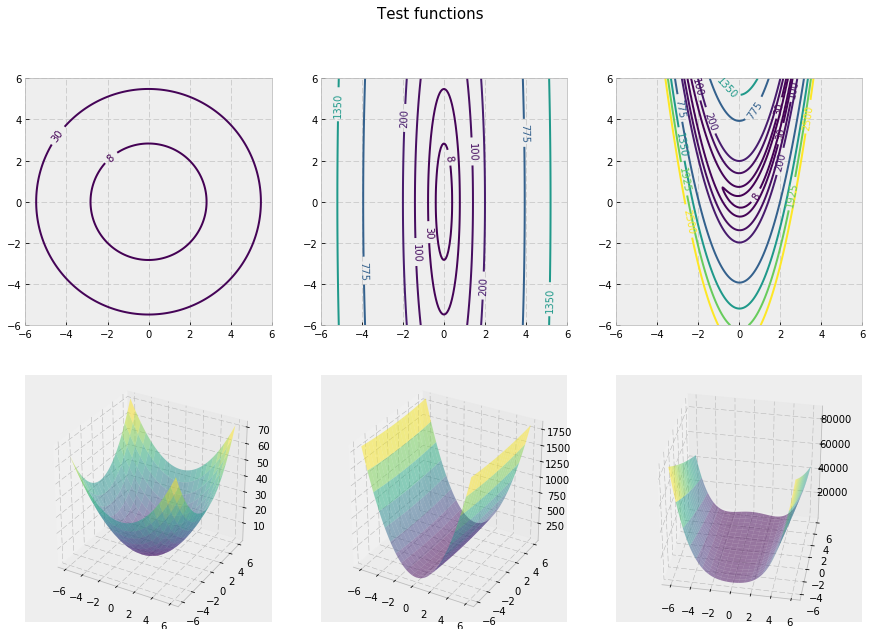

In [76]:
plt.rcParams["figure.figsize"] = (15,10)

x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)

X,Y = np.meshgrid(x,y)

Zs = [ f_1([X,Y]),  f_2([X,Y]),  f_3([X,Y])]

# Basic contour plot
levels1 = np.linspace(8, 20, 1)
levels2 = np.linspace(30, 100, 2)
levels3 = np.linspace(200, 2500, 5)

fig = plt.figure()
ax_11 =  fig.add_subplot(231)
ax_12 =  fig.add_subplot(232)
ax_13 =  fig.add_subplot(233)
ax_21 =  fig.add_subplot(234, projection='3d')
ax_22 =  fig.add_subplot(235, projection='3d')
ax_23 =  fig.add_subplot(236, projection='3d')

CS = ax_11.contour(X, Y, Zs[0], levels=np.concatenate((levels1, levels2, levels3)), cmap='viridis')
ax_11.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
ax_11.axis('equal')

CS = ax_12.contour(X, Y, Zs[1], levels=np.concatenate((levels1, levels2, levels3)), cmap='viridis')
ax_12.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
ax_12.axis('equal')

CS =ax_13.contour(X, Y, Zs[2], levels=np.concatenate((levels1, levels2, levels3)), cmap='viridis')
ax_13.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
ax_13.axis('equal')

ax_21.plot_surface(X,Y, Zs[0], rstride=10, cstride=10, cmap='viridis', alpha=0.5)
ax_22.plot_surface(X,Y, Zs[1], rstride=10, cstride=10,  cmap='viridis', alpha=0.5)

ax_23.plot_surface(X,Y, Zs[2], rstride=10, cstride=10,  cmap='viridis', alpha=0.5)
ax_23.view_init(35, -80)

plt.suptitle("Test functions", fontsize=15)

plt.show()

#### 코드 실습

- 아래 코드에 빈 부분을 채워서 완성해보세요.

- <span class="code-body">def f_alpha(alpha, x, d)</span>를 완성하기 위한 수식

$$
 \bar{f}(\alpha) \equiv f\left(\mathbf{x}^{(k)} + \alpha \mathbf{d}^{(k)}\right) 
$$

- <span class="code-body">def grad(x)</span>를 완성하기 위한 수식

$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, \color{RoyalBlue}{x_i+\frac{1}{2}\Delta x_i}, \cdots, x_n)-f(x_1, \cdots, \color{RoyalBlue}{x_i - \frac{1}{2} \Delta x_i} , \cdots, x_n) }{\Delta x_i}
$$

- 강하방향 계산 부분을 완성하기 위한 수식
    - 최속강하법
    
    $$\mathbf{d}^{(k)} = - \mathbf{c}^{(k)}$$
    
    - 공액경사법
    
     $$
    \mathbf{d}^{(k)} = - \mathbf{c}^{(k)} + \beta_{k} \mathbf{d}^{(k-1)} \\[5pt]
    \beta_k = \left( \frac{\lVert \mathbf{c}^{(k)} \rVert}{\lVert \mathbf{c}^{(k-1)} \rVert} \right)^2
    $$
    
- 업데이트 부분을 완성하기 위한 수식    

$$
    \mathbf{x}^{(k+1)} =  \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}
    $$

In [ ]:
#######################################################
# 직접 실습을 하기 위한 코드 셀입니다.
# pass로 되어 있는 부부을 위 수식으로 채워넣으세요.
# 제대로 코딩된 버전은 바로 아래 코드셀에 있습니다.
#######################################################

#######################################################
# set current fuction and method
j = 1
CGM = False    # False:최속강하법, True:공액경사도법
#######################################################

f = F[j]
Z = Zs[j]

def f_alpha(alpha, x, d) :
    """
    This is a one-dimensional version of the error function
    given by the parameter alpha
    """
    #########################################################
    # 여기 코드를 적어 완성하세요.
    #########################################################
    #  x + alpha*d
    pass
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    return f(x_new)

def grad(x):
    """
    This function computes the gradient of the objective function
    at the point x by finite difference. 
    """
    h = 1.0e-6
    g = np.zeros(x.shape[0]).astype('longdouble')
    
    #########################################################
    # 여기 코드를 적어 완성하세요.
    #########################################################
    for i in range(x.shape[0]) :
        pass
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    return g

#################################################################
# initialize
#################################################################
x = np.array([5.,-5.]).astype('longdouble')
B = 4.0             # 초기 황금분할탐색 인터벌
eps = 1.0e-6  # 반복 중단 기준
xs = [x, ]

################################################################
# information
#################################################################
print("INIT POINT : {}, dtype : {}".format(x, x.dtype))
print("METHOD     : {}".format("CGM" if CGM else "SDM"))
print("\n")

print("################################################################")
print("# START OPTIMIZATION")
print("################################################################")

for i in range(15000): # while True :
    # 현재 위치 x에서 경사도벡터 계산
    c = grad(x)

    # 정지조건 점검
    if np.linalg.norm(c) < eps :
        print('break')
        print( "iter:{:4d}, x:{}, cost:{}".format(i, x.T, f(x)) )
        break;
    
    #########################################################
    # 강하방향을 계산합니다. : 여기 코드를 적어 완성하세요.
    # 강하방향의 변수는 d로 하세요.
    #########################################################
    if i > 1 and CGM == True :        
        pass
    else :
        pass
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    # 1차원 선탐색
    alpha = gss(0, B, x, d) #황금분할탐색
    B = 2*alpha # 현재 스탭을 기준으로 다음 선탐색 구간을 설정
    
    # 현 단계의 코스트와 각종 변수들을 저장합니다.
    cost_old = f(x)
    x_old = x.copy()
    c_old = c.copy()
    d_old = d.copy()
    
    #########################################################
    # 설계변수를 업데이트 합니다. : 여기 코드를 적어 완성하세요.
    #########################################################
    pass
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    # 새로운 코스트를 계산
    cost_new = f(x)
        
    # 목적함수가 증가하지 않았는지 체크
    if cost_new > cost_old :
        print("ERROR")
        print("Iter:{:+2d}, Cost_old:{:.7f}, Cost_new:{:.7f}".format(i, cost_old, cost_new))
        break;
            
    # 정보 출력
    if i % 50 == 0 :
        print( "Iter:{:04d}, x_1  :{:+.6f},  x_2 : {:+.6f}, |c| : {:#012.6f}, Cost:{:.14f}".format(i, x[0], x[1], np.linalg.norm(c), f(x)) )
        
    # 애니메이션 생성을 위한 정보 저장, 특정 거리보다 더 많이 전진했으면 저장
    if np.linalg.norm(x-x_old) > 1.0e-3 :
        xs.append(x)
    
x_hist = np.array(xs)

In [ ]:
#######################################################
# set current fuction and method
j = 2
CGM = True    # False:최속강하법, True:공액경사도법
#######################################################

f = F[j]
Z = Zs[j]

def f_alpha(alpha, x, d) :
    """
    This is a one-dimensional version of the error function
    given by the parameter alpha
    """
    #########################################################
    # 여기 코드를 적어 완성하세요.
    #########################################################
    x_new = x + alpha * d
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    return f(x_new)

def grad(x):
    """
    This function computes the gradient of the objective function
    at the point x by finite difference. 
    """
    h = 1.0e-6
    g = np.zeros(x.shape[0]).astype('longdouble')
    
    #########################################################
    # 여기 코드를 적어 완성하세요.
    #########################################################
    for i in range(x.shape[0]) :
        dx1 = x.copy()
        dx2 = x.copy()
        
        dx1[i] += h 
        dx2[i] -= h 
        
        g[i] = ( f(dx1) - f(dx2) ) / (2*h)
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    return g

#################################################################
# initialize
#################################################################
x = np.array([5.,-5.]).astype('longdouble')
B = 4.0             # 초기 황금분할탐색 인터벌
eps = 1.0e-6  # 반복 중단 기준
xs = [x, ]

################################################################
# information
#################################################################
print("INIT POINT : {}, dtype : {}".format(x, x.dtype))
print("METHOD     : {}".format("CGM" if CGM else "SDM"))
print("\n")

print("################################################################")
print("# START OPTIMIZATION")
print("################################################################")

for i in range(15000): # while True :
    # 현재 위치 x에서 경사도벡터 계산
    c = grad(x)

    # 정지조건 점검
    if np.linalg.norm(c) < eps :
        print('break')
        print( "iter:{:4d}, x:{}, cost:{}".format(i, x.T, f(x)) )
        break;
    
    #########################################################
    # 강하방향을 계산합니다. : 여기 코드를 적어 완성하세요.
    # 강하방향의 변수는 d로 하세요.
    #########################################################
    if i > 1 and CGM == True :        
        beta = (np.linalg.norm(c) / np.linalg.norm(c_old))**2
        d = -c + beta*d_old
    else :
        d = -c # for steepest descent method 
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    # 1차원 선탐색
    alpha = gss(0, B, x, d) #황금분할탐색
    B = 2*alpha # 현재 스탭을 기준으로 다음 선탐색 구간을 설정
    
    # 현 단계의 코스트와 각종 변수들을 저장합니다.
    cost_old = f(x)
    x_old = x.copy()
    c_old = c.copy()
    d_old = d.copy()
    
    #########################################################
    # 설계변수를 업데이트 합니다. : 여기 코드를 적어 완성하세요.
    #########################################################
    x = x + alpha * d
    #########################################################
    # 여기까지 코드를 적어 완성하세요.
    #########################################################
    
    # 새로운 코스트를 계산
    cost_new = f(x)
        
    # 목적함수가 증가하지 않았는지 체크
    if 0 : #if cost_new > cost_old :
        print("ERROR")
        print("Iter:{:+2d}, Cost_old:{:.7f}, Cost_new:{:.7f}".format(i, cost_old, cost_new))
        break;
            
    # 정보 출력
    if i % 50 == 0 :
        print( "Iter:{:04d}, x_1  :{:+.6f},  x_2 : {:+.6f}, |c| : {:#012.6f}, Cost:{:.14f}".format(i, x[0], x[1], np.linalg.norm(c), f(x)) )
        
    # 애니메이션 생성을 위한 정보 저장, 특정 거리보다 더 많이 전진했으면 저장
    if np.linalg.norm(x-x_old) > 1.0e-3 :
        xs.append(x)
    
x_hist = np.array(xs)

In [ ]:
#######################################################
# 위 코드 셀에서 수행한 최적화 과정을 그리는 코드
# 실행하면 설계변수의 업데이트 내역이 그려짐
#######################################################

plt.rcParams["figure.figsize"] = (10,10)

CS = plt.contour(X, Y, Z, levels=np.concatenate((levels1, levels2, levels3)), cmap='viridis')
plt.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
plt.plot(*OPTIMS[j], 'o', color=style_colors[3])
plt.plot(x_hist[:,0], x_hist[:,1], 'o-', color=style_colors[1], alpha=0.3)
plt.axis('equal')
plt.show()

In [ ]:
#######################################################
# 설계변수의 업데이트 내역을 애니메이션으로 그림
# azure notebook에서는 에러나기 때문에 로컬 환경에 jupyter를 구성해야함
#######################################################

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'o', color=style_colors[1], alpha=0.5, animated=True)
plt.plot(*OPTIMS[j], 'o', color=style_colors[3])
CS = plt.contour(X, Y, Z, levels=np.concatenate((levels1, levels2, levels3)), cmap='viridis')
plt.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)

def init():
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    return ln,

def update(frame):
    if len(xdata) > 0 : 
        xdata[0] = x_hist[frame,0]
    else :
        xdata.append(x_hist[frame,0])
    
    if len(ydata) > 0 :
        ydata[0] = x_hist[frame,1]
    else :
        ydata.append(x_hist[frame,1])
        
    ln.set_data(xdata, ydata)
    return ln,

ani = animation.FuncAnimation(fig, update, frames=np.arange(x_hist.shape[0]), interval=60,
                    init_func=init, blit=True)

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
HTML(ani.to_html5_video())

### 전역적 최적성


#### 볼록집합<sup>convex set</sup>

- 어떤 집합 $S$내의 임의의 점 $P_1$, $P_2$를 잇는 선분 전체가 $S$내에 있다면 집합 $S$는 볼록집합

- 일반적으로 두점으로 정의되는 선분

$$
\mathbf{x} = \alpha \mathbf{x}^{(2)} + (1-\alpha)\mathbf{x}^{(1)}
$$

- 위 선분 전체가 집합 $S$에 속하면 볼록집합

<img src="03-optim/convexset.png" width="600">


#### 볼록함수<sup>convex function</sup>

- 볼록집합 $S$상에 정의된 $n$변수의 함수 $f(\mathbf{x})$는 집합 $S$내의 모든 점에서 함수의 헤시안이 양정 또는 양반정이면 볼록함수

- 1차원 문제에서는 2계 도함수(2번 미분)가 음이 아님

<img src="03-optim/convexfunction.png" width="600">

#### 볼록계획문제<sup>convex programming problem</sup>

- 볼록집합에서 정의된 목적함수가 볼록함수 $\implies$ 볼록계획문제

- 볼록계획문제에서는 지역최소는 곧 전역최소



### 1. 함수표면의 접면에 수직

- 여기서 접면은 개념적 표현

- 2변수 실함수라면 접선이되고, 3변수 실함수라면 접면, 4변수 이상 실함수라면 초 접평면<sup>hyper tangent plane</sup>이 된다.

-  아래 그림은 3변수 음함수를 나타낸것

<img src="03-optim/tang-grad2.png" width="550">


#### [증명]

- 위 그림처럼 $f(\mathbf{x})= \text{constant}$인 곡면 위를 지나고 $\mathbf{x}^*$를 통과하는 임의의 곡선 $\mathbf{C}$에 대해서

- 곡선 $\mathbf{C}$가 $s$에 대해서 매개변수화되었다 하자.

- 즉 곡선 $\mathbf{C} = [\, f_1(s) \quad f_2(s) \quad f_3(s)\, ]^{\text{T}}$인 "일변수 벡터함수"이다.

- 이렇게 정의된 곡선 $\mathbf{C}$의 $\mathbf{x}^*$에서 접선벡터는 각 성분을 $s$에 대해 미분한 것이므로

$$
\mathbf{T} = \begin{bmatrix} \dfrac{\partial \, x_1}{\partial \, s} & \dfrac{\partial \, x_2}{\partial \, s} & \cdots & \dfrac{\partial \, x_n}{\partial \, s} \end{bmatrix}^{\text{T}}
$$

- 이제 매개변수 $s$가 미세하게 변할 때 곡면 함수 $f(\mathbf{x})$의 변화를 생각하자.

- 즉, 곡면 함수 $f(\mathbf{x})$를 $s$로 미분하는 것이다.

- 그런데 $s$가 변해감에 따라 곡면 함수 $f(\mathbf{x})$의 값은 변하지 않고 $\text{constant}$로 일정하므로

$$
\frac{\partial f}{\partial s} = 0
$$

- 미분의 연쇄법칙을 적용하면

$$
\frac{\partial f}{\partial s} = \color{RoyalBlue}{\frac{\partial f}{\partial x_1}}\color{OrangeRed}{\frac{\partial x_1}{\partial s}} + \color{RoyalBlue}{\frac{\partial f}{\partial x_2}}\color{OrangeRed}{\frac{\partial x_2}{\partial s}} + \cdots + \color{RoyalBlue}{\frac{\partial f}{\partial x_n}}\color{OrangeRed}{\frac{\partial x_n}{\partial s}} =0
$$

- 위 식을 파란색 부분과 주황색 부분을 따로 모아 벡터형식으로 쓰면

$$
\frac{\partial f}{\partial s} = \begin{bmatrix}\color{RoyalBlue}{\dfrac{\partial f}{\partial x_1}} & \color{RoyalBlue}{\dfrac{\partial f}{\partial x_2}} & \cdots &  \color{RoyalBlue}{\dfrac{\partial f}{\partial x_n}} \end{bmatrix}^{\text{T}} \cdot \begin{bmatrix} \color{OrangeRed}{\dfrac{\partial x_1}{\partial s}} & \color{OrangeRed}{\dfrac{\partial x_2}{\partial s}} & \cdots & \color{OrangeRed}{\dfrac{\partial x_n}{\partial s}}\end{bmatrix} =  0
$$

- 결국 파란부분은 경사도벡터, 주황색 부분은 접선벡터 $\mathbf{T}$가 되고 

$$
\color{RoyalBlue}{\mathbf{c}} \cdot \color{OrangeRed}{ \mathbf{T} }= 0
$$

- 경사도벡터 $\mathbf{c}$는 접선과의 내적이 0이므로 접선에 수직이 된다.



### 2. 경사도벡터의 방향은 함수의 최대증가방향


<img src="03-optim/tang-grad2.png" width="550">


#### [증명]

- 이번에는 $\mathbf{x}^*$에서 접선 방향이 아닌  방향으로의 단위벡터를 $\mathbf{u}$라 하자.

- $\mathbf{x}^*$에서 $\mathbf{u}$방향으로의 변화는 $\mathbf{x}^* + t \, \mathbf{u}$로 표시 가능

- 이제 점 $\mathbf{x}^*$에서 $\mathbf{u}$방향으로 $t$에 대한 미분을 생각해 볼 수 있는데

- 이러한 미분을 방향미분이라 한다. 미분의 정의대로 쓰면

$$
\triangledown_{\mathbf{u}} f = \lim_{t \to 0} \frac{f(\mathbf{x}^* + t \, \mathbf{u}) - f(\mathbf{x^*})}{t} \tag{*}
$$

- 분자의 $f(\mathbf{x}^* + t \, \mathbf{u})$을 테일러 시리즈 전개하면

$$
f( \mathbf{x}^* + t \mathbf{u}) = f(\mathbf{x}^*) + t \left[ u_1 \frac{\partial f}{\partial x_1} + u_2 \frac{\partial f}{\partial x_2} + \cdots + u_n \frac{\partial f}{\partial x_n} \right] + O(t^2)
$$

- 시그마 기호를 도입하고 양변에 $f(\mathbf{x}^*)$를 빼면

$$
f( \mathbf{x}^* + t \mathbf{u} ) - f(\mathbf{x}^*) = t \sum_{i=1}^n u_i \frac{\partial f}{\partial x_i}+ O(t^2)
$$

- 위 결과를 $(*)$ 대입하면

$$
\begin{align}
\triangledown_{\mathbf{u}} f &=  \lim_{t \to 0} \frac{ t \sum_{i=1}^n u_i \frac{\partial f}{\partial x_i}+ O(t^2)}{t} \\[5pt]
&= \sum_{i=1}^n u_i \frac{\partial f}{\partial x_i} =  \mathbf{c} \cdot \mathbf{u}
\end{align}
$$

- 즉, 함수 $f(\mathbf{x})$의 $\mathbf{u}$방향으로의 변화율은 경사도벡터 $\mathbf{c}$와 단위벡터 $\mathbf{u}$의 내적

- 내적의 정의에 의해

$$
 \mathbf{c} \cdot \mathbf{u} = \lvert  \mathbf{c} \rvert \lvert \mathbf{u} \rvert \cos \theta
$$

- 위 변화율이 최대가 되려면 $\theta$가 0&deg; 또는 180&deg;

- 따라서 경사도벡터 방향으로 변화할때 변화율이 가장 크다. 그 변화율은 경사도벡터의 크기이다. ($\because \lvert \mathbf{u} \rvert = 1, \quad \cos \theta = 1$)



## 참고문헌

1.  최적설계입문Introduction to Optimum Design, Jasbir S. Arora

2. http://jjycjnmath.tistory.com/32?category=738760




In [13]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    table { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }     
    p  { font-family: 'Georgia','Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Georgia','Nanum Myeongjo';font-size: 12pt; line-height: 200%; }
    li > p { text-indent: 0px; }
    /* blockquote > p { font-family: 'Georgia','Nanum Myeongjo' !important; font-size: 12pt !important; } */
    sup { font-family: 'Georgia'; } 
    code, pre { font-family: 'Nanum Gothic Coding' !important; font-size: 13pt !important;line-height:130% !important; }
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .fig-title { font-family: 'Noto Sans KR'; font-size: 10pt;}
    .summary {font-family: 'Noto Sans KR'; /*font-size: 12pt;*/ line-height: 200%; 
              border-left:3px solid #FF0000;padding-left:20px;margin-top:10px; }
</style>